In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.decomposition
import sklearn.impute
import geopandas
import pandas
import shapely
import numpy
import matplotlib.pyplot as plt

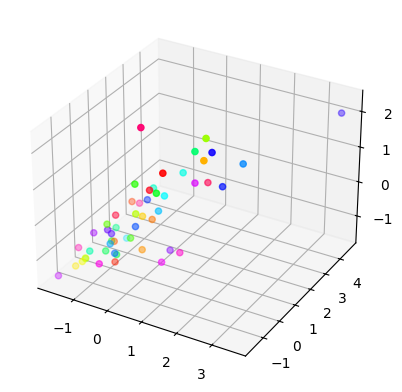

In [2]:
# Read the US Map and the data
# Same as the code in the previous two lectures
map = geopandas.read_file("cb_2018_us_state_20m.zip")
data = pandas.read_csv("SASUMMARY__ALL_AREAS_1998_2022.csv")
sub = data.pivot(index = "GeoName", columns = "LineCode", values = "2021")
sub["NAME"] = sub.index
combined = map.merge(sub, how = "left", on = "NAME")[["NAME", "geometry", 11, 12, 13]]
features = combined[[11, 12, 13]]
impute = sklearn.impute.SimpleImputer(strategy = "mean")
impute.fit(features)
full = impute.transform(features)
scale = sklearn.preprocessing.StandardScaler()
scale.fit(full)
x = scale.transform(full)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = range(len(x)), cmap = "hsv")

In [3]:
# Compute the first two principal components
pca = sklearn.decomposition.PCA(n_components = 3)
pca.fit(x)
pca.components_

array([[ 0.58589369,  0.59271993,  0.55264063],
       [-0.45500855, -0.3237046 ,  0.82956769],
       [-0.67059362,  0.73749469, -0.08003615]])

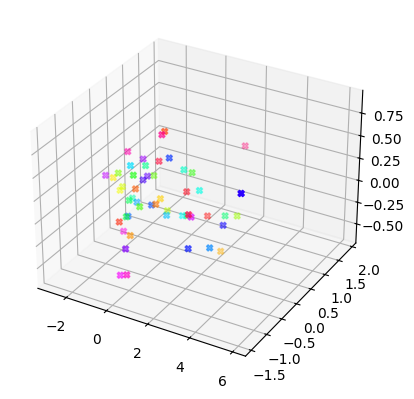

In [4]:
# Transform the points to the PCA component space
y = pca.transform(x)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(y[:, 0], y[:, 1], y[:, 2], c = range(len(x)), cmap = "hsv", marker = "X")

In [5]:
# Test the algebra to compute the reconstruct
x_pred = y @ pca.components_ + pca.mean_
numpy.hstack([x_pred, x])[:10, :]

array([[ 5.39304447e-01,  1.39341516e-01,  1.30270512e+00,
         5.39304447e-01,  1.39341516e-01,  1.30270512e+00],
       [-4.25587134e-01, -7.91171106e-01, -1.09569665e+00,
        -4.25587134e-01, -7.91171106e-01, -1.09569665e+00],
       [-5.43762872e-01,  4.56944285e-01,  7.20391622e-02,
        -5.43762872e-01,  4.56944285e-01,  7.20391622e-02],
       [-5.92266793e-01, -5.00588935e-01, -6.79378459e-01,
        -5.92266793e-01, -5.00588935e-01, -6.79378459e-01],
       [ 1.86599636e-01,  1.87328917e-01, -1.16031250e-01,
         1.86599636e-01,  1.87328917e-01, -1.16031250e-01],
       [ 1.38095715e-01, -3.15431393e-01, -7.81333935e-01,
         1.38095715e-01, -3.15431393e-01, -7.81333935e-01],
       [ 1.45190712e+00,  6.71780189e-01,  1.68604619e+00,
         1.45190712e+00,  6.71780189e-01,  1.68604619e+00],
       [-1.01997824e-15, -1.07432091e-15,  2.04643286e-15,
        -1.01997824e-15, -1.07432091e-15,  2.04643286e-15],
       [-1.36917064e+00, -1.24491044e+00, -1.301

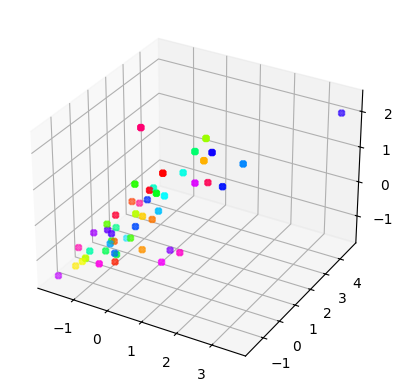

In [6]:
# Compare the reconstruction and the original points
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = range(len(x)), cmap = "hsv")
ax.scatter(x_pred[:, 0], x_pred[:, 1], x_pred[:, 2], c = range(len(x)), cmap = "hsv", marker = "X")